In [1]:
!pip install -U emoji

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: emoji in /home/satyasai/.local/lib/python3.7/site-packages (0.5.4)


In [2]:
!pip install -U nltk

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: nltk in /home/satyasai/.local/lib/python3.7/site-packages (3.5)


In [3]:
!pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: textblob in /home/satyasai/.local/lib/python3.7/site-packages (0.15.3)


In [1]:
%%time
%%bash

echo "OSTYPE=$OSTYPE"
if [[ "$OSTYPE" == "cygwin" ]] || [[ "$OSTYPE" == "msys" ]] ; then
    echo "Windows or Windows-like environment detected, script not tested, and may not work."
    echo "Try installing the components mention in the install-[ostype].sh scripts manually."
    echo "Or try running under CGYWIN or git-bash."
    echo "If successfully installed, please contribute back with the solution via a pull request, to https://github.com/neomatrix369/awesome-ai-ml-dl/"
    echo "Please give the file a good name, i.e. install-windows.sh or install-windows.bat depending on what kind of script you end up writing"
    exit 0
elif [[ "$OSTYPE" == "linux-gnu" ]] || [[ "$OSTYPE" == "linux" ]]; then
    TARGET_OS="linux"
else
    TARGET_OS="macos"
fi

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
  
  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl"
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/build

  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true 
fi

OSTYPE=linux-gnu
Library source found
Detected OS: linux
Please check if you fulfill the requirements mentioned in the README file.
Reading package lists...


E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


CPU times: user 1.72 ms, sys: 7.34 ms, total: 9.07 ms
Wall time: 240 ms


In [2]:
import sys
sys.path.insert(0, '../../library')

from org.neomatrix369.nlp_profiler import apply_text_profiling

import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/satyasai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/satyasai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Text messages with Emojis, Numbers, Alphanumeric, None-alphanumeric, Punctuations, Dates and Duplicates

In [3]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = '2833047 people live in this area. It is not a good area.'
text_with_two_numbers = '2833047 and 1111 people live in this area.'
text_with_punctuations = "This sentence doesn't seem to too many commas, periods or semi-colons (;)."
text_with_a_date = "Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "Todays date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = 'Everyone here is so hardworking. Hardworking people. I think hardworking people are a good trait in our company.'

In [4]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,I love ⚽ very much 😁.
1,2833047 people live in this area. It is not a ...
2,2833047 and 1111 people live in this area.
3,"This sentence doesn't seem to too many commas,..."
4,Todays date is 04/28/2020 for format mm/dd/yyy...
5,Todays date is 28/04/2020 and tomorrow's date ...
6,Everyone here is so hardworking. Hardworking p...


In [5]:
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')
profiled_text_dataframe

,text,sentiment_polarity_score,sentiment_polarity,sentiment_subjectivity_score,sentiment_subjectivity,spellcheck_score,spelling_quality,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
0,I love ⚽ very much 😁.,0.380000,Positive,0.43,Objective/subjective,1.000000,Good,2,21,5,4,0,16,2,0,13,8,1,1,0
1,2833047 people live in this area. It is not a ...,-0.106818,Negative,0.55,Objective/subjective,0.968802,Quite good,3,56,11,11,2,45,0,1,43,13,2,5,0
2,2833047 and 1111 people live in this area.,0.136364,Positive,0.50,Objective/subjective,1.000000,Good,2,42,7,6,0,35,0,2,34,8,1,3,0
3,"This sentence doesn't seem to too many commas,...",0.375000,Positive,0.75,Pretty subjective,0.923887,Quite good,2,74,11,13,0,63,0,0,56,18,7,4,0
4,Todays date is 04/28/2020 for format mm/dd/yyy...,0.000000,Neutral,0.00,Very objective,0.711513,Pretty good,2,64,8,9,0,56,0,6,48,16,8,3,1
5,Todays date is 28/04/2020 and tomorrow's date ...,0.000000,Neutral,0.00,Very objective,0.748268,Pretty good,2,60,8,8,2,52,0,6,46,14,6,3,2
6,Everyone here is so hardworking. Hardworking p...,0.700000,Positive,0.60,Objective/subjective,0.857143,Pretty good,4,112,17,18,3,95,0,0,92,20,3,7,0


### Sentiment Analysis

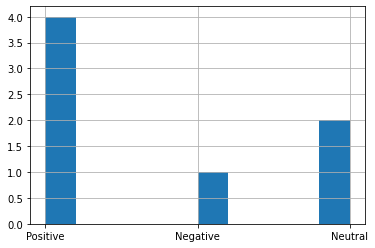

In [6]:
profiled_text_dataframe['sentiment_polarity'].hist()

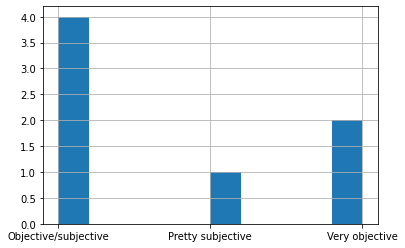

In [7]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

### Spelling quality check

#### The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

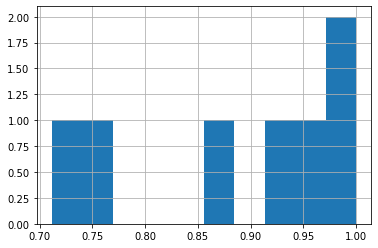

In [8]:
profiled_text_dataframe['spellcheck_score'].hist()

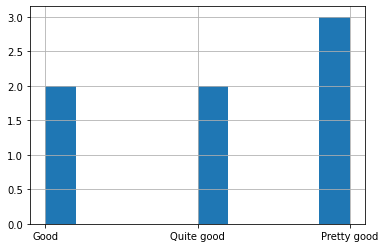

In [9]:
profiled_text_dataframe['spelling_quality'].hist()

### Resources

- https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
- https://textblob.readthedocs.io/en/dev/quickstart.html